## This is a learning demo

## Referance:
https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [3]:
train_file = "../input/train.csv"
test_file = "../input/test.csv"
output_file = "submission.csv"

In [4]:
# train set
train = pd.read_csv("../input/train.csv")
train_Y = train["label"]
train_X = train.drop(labels = ["label"],axis = 1)

In [5]:
# test set
test = pd.read_csv(test_file)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

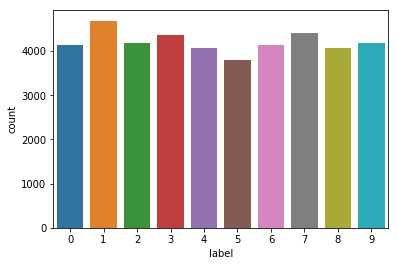

In [6]:
fig = sns.countplot(train_Y)
train_Y.value_counts()

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
# Normalization
train_X = train_X / 255.

In [9]:
# the image should be width = height = 28, channel = 1
# reshape
train_X = train_X.values.reshape(-1, 28, 28, 1)

In [10]:
print(train_X.shape)

(42000, 28, 28, 1)


In [11]:
# lable encoding to one-hot key
# example 2 -> [0,0,1,0,0,0,0,0,0,0]
train_Y = to_categorical(train_Y, num_classes=10)

In [12]:
train_Y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
seed = 2

In [14]:
# split the train set into train set into train and dev set
train_X, dev_X, train_Y, dev_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=seed)

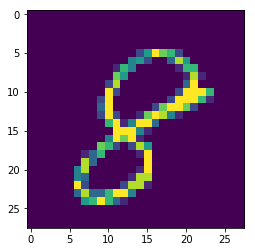

In [15]:
fig = plt.imshow(train_X[0][:,:,0])

## Let's try the simple softmax

The model like input->(FL)softmax

Here need to reshape train_X to (#example number, width*heigth*channel) be the input

In [16]:
train_X_SS = train_X.reshape(train_X.shape[0], -1)
train_X_SS, dev_X_SS, train_Y_SS, dev_Y_SS = train_test_split(train_X_SS, train_Y, test_size=0.1, random_state=seed)

In [17]:
simple_softmax_model = Sequential()
simple_softmax_model.add(Dense(10, input_dim=train_X_SS.shape[1], activation='softmax'))

simple_softmax_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [18]:
print("training---------------")
simple_softmax_model.fit(train_X_SS, train_Y_SS, epochs=20, batch_size=23)

print("testing----------------")
loss, accuracy = simple_softmax_model.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/20
34020/34020 [==============================] - 12s 352us/step - loss: 1.2676 - acc: 0.6964
Epoch 2/20
34020/34020 [==============================] - 5s 158us/step - loss: 0.6419 - acc: 0.8559
Epoch 3/20
34020/34020 [==============================] - 5s 159us/step - loss: 0.4960 - acc: 0.8776
Epoch 4/20
34020/34020 [==============================] - 5s 159us/step - loss: 0.4304 - acc: 0.8878
Epoch 5/20
34020/34020 [==============================] - 5s 159us/step - loss: 0.3933 - acc: 0.8949
Epoch 6/20
34020/34020 [==============================] - 5s 159us/step - loss: 0.3692 - acc: 0.9004
Epoch 7/20
34020/34020 [==============================] - 5s 157us/step - loss: 0.3523 - acc: 0.9036
Epoch 8/20
34020/34020 [==============================] - 5s 159us/step - loss: 0.3396 - acc: 0.9073
Epoch 9/20
34020/34020 [==============================] - 5s 160us/step - loss: 0.3296 - acc: 0.9098
Epoch 10/20
34020/34020 [==============================] - 5s 159u

## Try to add some hiden layers like relu

In [19]:
simple_softmax_model_v2 = Sequential()
simple_softmax_model_v2.add(Dense(32, input_dim=train_X_SS.shape[1], activation='relu'))
simple_softmax_model_v2.add(Dense(16, activation='relu'))
simple_softmax_model_v2.add(Dense(8, activation='relu'))
simple_softmax_model_v2.add(Dense(10, activation='softmax'))

simple_softmax_model_v2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [20]:
print("training---------------")
simple_softmax_model_v2.fit(train_X_SS, train_Y_SS, epochs=20, batch_size=23)

print("testing----------------")
loss, accuracy = simple_softmax_model_v2.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/20
34020/34020 [==============================] - 8s 225us/step - loss: 1.5851 - acc: 0.4575
Epoch 2/20
34020/34020 [==============================] - 7s 216us/step - loss: 0.6578 - acc: 0.8242
Epoch 3/20
34020/34020 [==============================] - 7s 213us/step - loss: 0.4633 - acc: 0.8740
Epoch 4/20
34020/34020 [==============================] - 7s 216us/step - loss: 0.3887 - acc: 0.8933
Epoch 5/20
34020/34020 [==============================] - 7s 217us/step - loss: 0.3466 - acc: 0.9034
Epoch 6/20
34020/34020 [==============================] - 8s 221us/step - loss: 0.3171 - acc: 0.9110
Epoch 7/20
34020/34020 [==============================] - 7s 215us/step - loss: 0.2951 - acc: 0.9168
Epoch 8/20
34020/34020 [==============================] - 7s 216us/step - loss: 0.2782 - acc: 0.9213
Epoch 9/20
34020/34020 [==============================] - 7s 213us/step - loss: 0.2635 - acc: 0.9255
Epoch 10/20
34020/34020 [==============================] - 7s 214us

## The more hidden layers

In [23]:
simple_softmax_model_v3 = Sequential()
simple_softmax_model_v3.add(Dense(32, input_dim=train_X_SS.shape[1], activation='relu'))
simple_softmax_model_v3.add(Dense(16, activation='relu'))
simple_softmax_model_v3.add(Dense(8, activation='relu'))
simple_softmax_model_v3.add(Dense(4, activation='relu'))
simple_softmax_model_v3.add(Dense(2, activation='relu'))
simple_softmax_model_v3.add(Dense(10, activation='softmax'))

simple_softmax_model_v3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [24]:
# the model is relu(32)->relu(16)->relu(8)->relu(4)->relu(2)
print("training---------------")
simple_softmax_model_v3.fit(train_X_SS, train_Y_SS, epochs=20, batch_size=23)

print("testing----------------")
loss, accuracy = simple_softmax_model_v3.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/20
34020/34020 [==============================] - 9s 266us/step - loss: 2.0268 - acc: 0.2770
Epoch 2/20
34020/34020 [==============================] - 9s 258us/step - loss: 1.6027 - acc: 0.3887
Epoch 3/20
34020/34020 [==============================] - 9s 254us/step - loss: 1.4240 - acc: 0.4431
Epoch 4/20
34020/34020 [==============================] - 9s 256us/step - loss: 1.3168 - acc: 0.4912
Epoch 5/20
34020/34020 [==============================] - 9s 255us/step - loss: 1.2318 - acc: 0.5465
Epoch 6/20
34020/34020 [==============================] - 9s 261us/step - loss: 1.1542 - acc: 0.6184
Epoch 7/20
34020/34020 [==============================] - 9s 256us/step - loss: 1.0790 - acc: 0.6810
Epoch 8/20
34020/34020 [==============================] - 9s 256us/step - loss: 1.0121 - acc: 0.7169
Epoch 9/20
34020/34020 [==============================] - 9s 258us/step - loss: 0.9559 - acc: 0.7366
Epoch 10/20
34020/34020 [==============================] - 9s 256us

### Something happened,  may the nurel in the last layers too little

最后几层的神经网络的神经元数可能太少了，造成信息损失的问题。（调整神经网络的结构）

或者是出现了，梯度消失，梯度爆炸的问题。（学习速率衰减）

## 调整网络结构，每层神经元数加倍

In [26]:
simple_softmax_model_v4 = Sequential()
simple_softmax_model_v4.add(Dense(64, input_dim=train_X_SS.shape[1], activation='relu'))
simple_softmax_model_v4.add(Dense(32, activation='relu'))
simple_softmax_model_v4.add(Dense(16, activation='relu'))
simple_softmax_model_v4.add(Dense(8, activation='relu'))
simple_softmax_model_v4.add(Dense(10, activation='softmax'))

simple_softmax_model_v4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [28]:
# the model is relu(64)->relu(32)->relu(16)->relu(8)->softmax(10)
print("training---------------")
simple_softmax_model_v4.fit(train_X_SS, train_Y_SS, epochs=20, batch_size=23)

print("testing----------------")
loss, accuracy = simple_softmax_model_v4.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/20
34020/34020 [==============================] - 8s 230us/step - loss: 0.0817 - acc: 0.9783
Epoch 2/20
34020/34020 [==============================] - 8s 239us/step - loss: 0.0773 - acc: 0.9790
Epoch 3/20
34020/34020 [==============================] - 8s 239us/step - loss: 0.0738 - acc: 0.9792
Epoch 4/20
34020/34020 [==============================] - 8s 236us/step - loss: 0.0706 - acc: 0.9803
Epoch 5/20
34020/34020 [==============================] - 8s 242us/step - loss: 0.0671 - acc: 0.9818
Epoch 6/20
34020/34020 [==============================] - 8s 236us/step - loss: 0.0641 - acc: 0.9825
Epoch 7/20
34020/34020 [==============================] - 8s 237us/step - loss: 0.0610 - acc: 0.9830
Epoch 8/20
34020/34020 [==============================] - 8s 235us/step - loss: 0.0582 - acc: 0.9843
Epoch 9/20
34020/34020 [==============================] - 8s 236us/step - loss: 0.0553 - acc: 0.9848
Epoch 10/20
34020/34020 [==============================] - 8s 238us

### 可以看到情况已经有了很大的改善，现在加入学习速率衰减，加入dropout防止过拟合。

In [31]:
simple_softmax_model_v5 = Sequential()
simple_softmax_model_v5.add(Dense(64, input_dim=train_X_SS.shape[1], activation='relu'))
simple_softmax_model_v5.add(Dropout(0.25))
simple_softmax_model_v5.add(Dense(32, activation='relu'))
simple_softmax_model_v5.add(Dropout(0.25))
simple_softmax_model_v5.add(Dense(16, activation='relu'))
simple_softmax_model_v5.add(Dropout(0.25))
simple_softmax_model_v5.add(Dense(8, activation='relu'))
simple_softmax_model_v5.add(Dropout(0.25))
simple_softmax_model_v5.add(Dense(10, activation='softmax'))

simple_softmax_model_v5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [33]:
# the model is relu(64)->relu(32)->relu(16)->relu(8)->softmax(10)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

print("training---------------")
simple_softmax_model_v5.fit(train_X_SS, train_Y_SS, epochs=40, batch_size=23, callbacks=[annealer])

print("testing----------------")
loss, accuracy = simple_softmax_model_v5.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/40
34020/34020 [==============================] - 9s 257us/step - loss: 0.5163 - acc: 0.8487
Epoch 2/40
34020/34020 [==============================] - 9s 261us/step - loss: 0.5230 - acc: 0.8445
Epoch 3/40
34020/34020 [==============================] - 9s 261us/step - loss: 0.5017 - acc: 0.8534
Epoch 4/40
34020/34020 [==============================] - 9s 266us/step - loss: 0.4967 - acc: 0.8516
Epoch 5/40
34020/34020 [==============================] - 9s 262us/step - loss: 0.4763 - acc: 0.8601
Epoch 6/40
34020/34020 [==============================] - 9s 262us/step - loss: 0.4633 - acc: 0.8636
Epoch 7/40
34020/34020 [==============================] - 9s 266us/step - loss: 0.4589 - acc: 0.8660
Epoch 8/40
34020/34020 [==============================] - 9s 267us/step - loss: 0.4374 - acc: 0.8733
Epoch 9/40
34020/34020 [==============================] - 9s 264us/step - loss: 0.4360 - acc: 0.8708
Epoch 10/40
34020/34020 [==============================] - 9s 265us

## 加入BatchNormal层

BN层的作用

（1）加速收敛 （2）控制过拟合，可以少用或不用Dropout和正则 （3）降低网络对初始化权重不敏感 （4）允许使用较大的学习率

In [35]:
simple_softmax_model_v7 = Sequential()
simple_softmax_model_v7.add(Dense(64, input_dim=train_X_SS.shape[1], activation='relu'))
simple_softmax_model_v7.add(BatchNormalization())
simple_softmax_model_v7.add(Dropout(0.25))
simple_softmax_model_v7.add(Dense(32, activation='relu'))
simple_softmax_model_v7.add(BatchNormalization())
simple_softmax_model_v7.add(Dropout(0.25))
simple_softmax_model_v7.add(Dense(16, activation='relu'))
simple_softmax_model_v7.add(BatchNormalization())
simple_softmax_model_v7.add(Dropout(0.25))
simple_softmax_model_v7.add(Dense(8, activation='relu'))
simple_softmax_model_v7.add(BatchNormalization())
simple_softmax_model_v7.add(Dropout(0.25))
simple_softmax_model_v7.add(Dense(10, activation='softmax'))

simple_softmax_model_v7.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [36]:
# the model is relu(64)->relu(32)->relu(16)->relu(8)->softmax(10)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

print("training---------------")
simple_softmax_model_v7.fit(train_X_SS, train_Y_SS, epochs=40, batch_size=23, callbacks=[annealer])

print("testing----------------")
loss, accuracy = simple_softmax_model_v7.evaluate(dev_X_SS, dev_Y_SS)

print("test loss:", loss)
print("test accuracy:", accuracy)

training---------------
Epoch 1/40
34020/34020 [==============================] - 20s 590us/step - loss: 1.4114 - acc: 0.5295
Epoch 2/40
34020/34020 [==============================] - 18s 543us/step - loss: 0.8811 - acc: 0.7283
Epoch 3/40
34020/34020 [==============================] - 18s 541us/step - loss: 0.7458 - acc: 0.7806
Epoch 4/40
34020/34020 [==============================] - 18s 543us/step - loss: 0.6615 - acc: 0.8071
Epoch 5/40
34020/34020 [==============================] - 18s 543us/step - loss: 0.6161 - acc: 0.8212
Epoch 6/40
34020/34020 [==============================] - 18s 543us/step - loss: 0.5749 - acc: 0.8354
Epoch 7/40
34020/34020 [==============================] - 18s 544us/step - loss: 0.5443 - acc: 0.8431
Epoch 8/40
34020/34020 [==============================] - 18s 541us/step - loss: 0.5161 - acc: 0.8501
Epoch 9/40
34020/34020 [==============================] - 19s 546us/step - loss: 0.5050 - acc: 0.8578
Epoch 10/40
34020/34020 [==============================] -

## 加入BatchNormal后，可以看到现在Epoch的时间加倍，并且准确率和v4版本差异不大

## 由于数字图片每个像素，或者是数字部分是存在结构的，我们可以尝试使用CNN，对图片的特征进行提取

### **mark**:此处的输入，应该为未经一维化的的源图像。

In [39]:
cnn_model_v1 = Sequential()

cnn_model_v1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn_model_v1.add(BatchNormalization())
cnn_model_v1.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model_v1.add(BatchNormalization())
cnn_model_v1.add(MaxPool2D(strides=(2,2)))
cnn_model_v1.add(Dropout(0.25))

cnn_model_v1.add(Flatten())
cnn_model_v1.add(Dense(512, activation='relu'))
cnn_model_v1.add(Dropout(0.25))
cnn_model_v1.add(Dense(1024, activation='relu'))
cnn_model_v1.add(Dropout(0.5))
cnn_model_v1.add(Dense(10, activation='softmax'))
cnn_model_v1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [41]:
cnn_model_v1.fit(train_X, train_Y, epochs=20, batch_size=23, callbacks=[annealer])
loss, acc = cnn_model_v1.evaluate(dev_X, dev_Y)

print("test loss:", loss)
print("test accuary", acc)

Epoch 1/20
37800/37800 [==============================] - 23s 613us/step - loss: 0.0786 - acc: 0.9816
Epoch 2/20
37800/37800 [==============================] - 23s 613us/step - loss: 0.0451 - acc: 0.9880
Epoch 3/20
37800/37800 [==============================] - 23s 610us/step - loss: 0.0377 - acc: 0.9899
Epoch 4/20
37800/37800 [==============================] - 23s 609us/step - loss: 0.0285 - acc: 0.9923
Epoch 5/20
37800/37800 [==============================] - 23s 607us/step - loss: 0.0251 - acc: 0.9937
Epoch 6/20
37800/37800 [==============================] - 23s 616us/step - loss: 0.0210 - acc: 0.9947
Epoch 7/20
37800/37800 [==============================] - 23s 610us/step - loss: 0.0141 - acc: 0.9961
Epoch 8/20
37800/37800 [==============================] - 23s 608us/step - loss: 0.0122 - acc: 0.9966
Epoch 9/20
37800/37800 [==============================] - 23s 611us/step - loss: 0.0124 - acc: 0.9969
Epoch 10/20
37800/37800 [==============================] - 23s 608us/step - loss: 

### 可以看到，准确率上升的比较快，迅速归于99%+，充分证明的在图片分类过程中，加入CNN提取图片特征的必要性。
### 但是Epoch的时间很长，有没有什么解决办法。

# 增加神经网络的深度，增加图片生成技术，间接增大数据集

In [42]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',
                input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# fully connection
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [43]:
datagen = ImageDataGenerator(zoom_range=0.1, height_shift_range=0.1, width_shift_range=0.1, rotation_range=10)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [45]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [46]:
hist = model.fit_generator(datagen.flow(train_X, train_Y, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(dev_X[:400,:], dev_Y[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
 - 12s - loss: 0.8140 - acc: 0.7412 - val_loss: 0.1512 - val_acc: 0.9525
Epoch 2/20
 - 10s - loss: 0.3249 - acc: 0.8995 - val_loss: 0.0781 - val_acc: 0.9800
Epoch 3/20
 - 10s - loss: 0.2368 - acc: 0.9312 - val_loss: 0.0758 - val_acc: 0.9750
Epoch 4/20
 - 10s - loss: 0.2096 - acc: 0.9404 - val_loss: 0.0649 - val_acc: 0.9700
Epoch 5/20
 - 10s - loss: 0.1660 - acc: 0.9527 - val_loss: 0.0467 - val_acc: 0.9825
Epoch 6/20
 - 10s - loss: 0.1581 - acc: 0.9535 - val_loss: 0.0639 - val_acc: 0.9850
Epoch 7/20
 - 10s - loss: 0.1416 - acc: 0.9577 - val_loss: 0.0256 - val_acc: 0.9925
Epoch 8/20
 - 10s - loss: 0.1472 - acc: 0.9600 - val_loss: 0.0358 - val_acc: 0.9925
Epoch 9/20
 - 10s - loss: 0.1252 - acc: 0.9639 - val_loss: 0.0274 - val_acc: 0.9950
Epoch 10/20
 - 10s - loss: 0.1061 - acc: 0.9698 - val_loss: 0.0269 - val_acc: 0.9925
Epoch 11/20
 - 10s - loss: 0.1135 - acc: 0.9676 - val_loss: 0.0225 - val_acc: 0.9925
Epoch 12/20
 - 10s - loss: 0.1025 - acc: 0.9715 - val_loss: 0.0114 - val_a

In [47]:
final_loss, final_acc = model.evaluate(dev_X, dev_Y, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0249, final accuracy: 0.9933


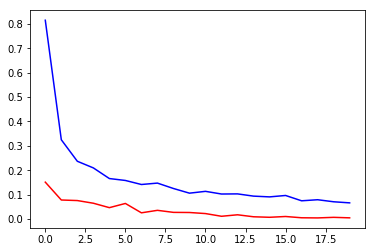

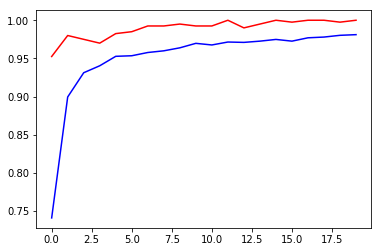

In [48]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [49]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [50]:
y_hat = model.predict(x_test, batch_size=64)

In [51]:
y_pred = np.argmax(y_hat,axis=1)

In [52]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))